<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: **<font color='blue'>Matin Alinejad**

**Student ID**: **<font color='green'>99101943**





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [7]:
# import necessary libraries
import numpy as np # Replace with 'import cupy as np' to run on GPU
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


class MyLogisticRegression:
    def __init__(self, learning_rate = 0.01, n_iter = 1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, y, y_hat):
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return np.where(y_predicted > 0.5, 1, 0)

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [8]:
# Your code goes here!

# Load data
data = pd.read_csv('Logistic_question.csv')

# Make target binary
data['Target'] = (data['Target'] >= 0.5).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['Target'], test_size = 0.2, random_state = 42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = MyLogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))

Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

The evaluation metrics used to assess the performance of the logistic regression model include accuracy, precision, recall, and the F1 score. Each of these metrics provides a different perspective on how well the model performs, especially in different contexts or for various tasks. Here's a breakdown of each metric and situations where they are particularly informative:

### 1. **Accuracy**
- **Definition**: Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined. It is calculated as $$\textbf{Accuracy} = \mathbf{\frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}}.$$


- **Useful Contexts**: Accuracy is a useful measure when the classes in the dataset are well balanced. It gives a quick measure of overall correctness. However, its usefulness decreases when dealing with imbalanced datasets, as it can be misleadingly high when the majority class is predicted correctly while largely ignoring the minority class.

### 2. **Precision**
- **Definition**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is calculated as $$\textbf{Precision} = \mathbf{\frac{\text{TP}}{\text{TP} + \text{FP}}}.$$


- **Useful Contexts**: Precision is crucial in scenarios where the cost of a false positive is high. For example, in email spam detection, a high precision model minimizes the risk of classifying important emails as spam. In medical testing, high precision minimizes false positive diagnoses, which can prevent unnecessary treatments that might be expensive or harmful.

### 3. **Recall** (also known as Sensitivity or True Positive Rate)
- **Definition**: Recall is the ratio of correctly predicted positive observations to all observations in actual class - yes. It is calculated as $$\textbf{Recall} = \mathbf{\frac{\text{TP}}{\text{TP} + \text{FN}}}.$$


- **Useful Contexts**: Recall is particularly important in cases where missing a positive instance is significantly worse than getting a false positive. For example, in fraud detection or disease screening, a high recall model ensures that most fraudulent activities or diseases are caught, even if some false alarms occur.

### 4. **F1 Score**
- **Definition**: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is calculated as $$\textbf{F1} = \mathbf{2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}}.$$


- **Useful Contexts**: The F1 score is useful when you want to strike a balance between Precision and Recall. It is particularly useful in scenarios where an uneven class distribution exists (i.e., when there are many more negatives than positives or vice versa). For example, in customer churn prediction or in any classification task where false positives and false negatives have a significant cost.

Each of these metrics helps to provide a fuller picture of how a model is performing, and depending on the specific requirements and consequences of a task, some metrics may be more important than others. The choice of which metric to prioritize should align with the business or clinical objectives, and the nature of the consequences for incorrect predictions.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [9]:
# Your code goes here!

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))

Accuracy: 0.9375
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

Based on the results you've shared, it's clear that the built-in `LogisticRegression` function from scikit-learn outperforms the custom implementation on most metrics. Here’s a comparison focusing on both performance and parameters:

### Performance Comparison
- **Accuracy**: The built-in model achieved an accuracy of 93.75% compared to 87.5% from the custom model. This suggests that the built-in model generally makes more correct predictions on the given dataset.
- **Precision**: The precision of the built-in model is slightly higher at 93.33% versus 87.5% for the custom model, indicating that the built-in model has a lower rate of false positives.
- **Recall**: Both models achieved a recall of 100%, which means both models were able to identify all the actual positives.
- **F1 Score**: The F1 score, which balances precision and recall, is higher for the built-in model (96.55%) compared to the custom model (93.33%). This indicates a better overall balance of precision and recall in the built-in model.

### Parameters and Their Impact
The built-in `LogisticRegression` function in scikit-learn comes with several parameters that can significantly impact the model's performance:

- **`solver`**: This parameter determines the algorithm to use for optimization. Common options include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'. Each solver works best under different conditions regarding data size, dimensionality, and whether the data fits well into memory.
  
- **`penalty`**: Specifies the norm used in the penalization. The most common are 'l2' (default) and 'l1'. Regularization is a technique used to reduce overfitting by discouraging overly complex models in some way. The choice of penalty can affect both the performance and convergence speed of the model.
  
- **`C`**: This is the inverse of regularization strength—smaller values specify stronger regularization. It can control the trade-off between achieving a low training error and a low testing error that is, the trade-off between underfitting and overfitting.

- **`max_iter`**: Defines the maximum number of iterations taken for the solvers to converge.

- **`class_weight`**: This parameter is used to adjust the weights inversely proportional to class frequencies in the input data. It’s especially useful for dealing with imbalanced datasets.

### Conclusion
The performance difference between the custom model and the built-in model could be attributed to several factors including the optimization algorithm, regularization, and convergence criteria used by the built-in model. Scikit-learn's `LogisticRegression` likely benefits from more sophisticated numerical optimization techniques as well as better handling of class imbalance and regularization which helps to prevent overfitting.

In general, while a custom implementation can be educational and give you detailed control over the modeling process, built-in functions are typically more robust, efficient, and well-optimized for general use cases. For practical applications, especially on larger datasets or complex real-world scenarios, leveraging built-in libraries like scikit-learn is advisable due to their maturity and extensive testing across various scenarios.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [14]:
# import necessary libraries
import numpy as np  # Replace with 'import cupy as np' to run on GPU
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000, n_classes=None):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.n_classes = n_classes

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _cross_entropy(self, y, y_hat):
        m = y.shape[0]
        return -np.sum(y * np.log(y_hat + 1e-8)) / m

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if self.n_classes is None:
            self.n_classes = np.max(y) + 1

        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros((1, self.n_classes))

        y_one_hot = np.eye(self.n_classes)[y]

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._softmax(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y_one_hot))
            db = (1 / n_samples) * np.sum(y_predicted - y_one_hot, axis=0)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._softmax(linear_model)
        return np.argmax(y_predicted, axis=1)

# Example usage:
# Assuming X_train and y_train are your data and labels respectively:
# model = MyMultinomialLogisticRegression(learning_rate=0.01, n_iter=1000)
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [18]:
# Your code goes here!

def quantize_target(data, levels):
    """This function quantizes the target data into 'levels' number of bins."""
    return pd.qcut(data, q = levels, labels = False, duplicates = 'drop')

# Load data
data = pd.read_csv('Logistic_question.csv')
features = data.iloc[:,:-1]

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

results = {}
for i in range(2, 11):  # Quantizing levels from 2 to 10
    target = quantize_target(data['Target'], i)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
    
    # Create and train the model
    model = MyMultinomialLogisticRegression(learning_rate=0.01, n_iter = 1000, n_classes=i)
    model.fit(X_train, y_train)
    
    # Predict on the test set and evaluate
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[i] = accuracy

# Output results
print(results)

{2: 0.9375, 3: 0.8875, 4: 0.725, 5: 0.4875, 6: 0.475, 7: 0.375, 8: 0.4375, 9: 0.4125, 10: 0.225}


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

Based on the reported results for the multinomial logistic regression model with different quantization levels ($i$) of the target variable, we can observe that the model performs best when $i=2$. Here's a breakdown and analysis of the results:

### Results Analysis
- **Best Performance**: The highest accuracy is achieved when the target is divided into two levels ($i=2$), with an accuracy of 93.75%.
- **Decreasing Accuracy with More Levels**: As the number of quantization levels increases, the accuracy generally decreases. This trend suggests that the model struggles with more complex classification tasks involving more classes.

### Why Does Accuracy Decline?
1. **Increased Complexity**: More levels mean more classes for the model to distinguish between. This can be more challenging, especially if the feature set does not contain enough discriminative information to separate more finely divided classes.
2. **Data Imbalance**: Higher quantization may lead to imbalances in class distribution, which are notoriously difficult for models to handle effectively without specific interventions like balancing class weights or using different sampling techniques.
3. **Overfitting Risks**: With more classes, the model may also be at a higher risk of overfitting, particularly if there are not enough training samples per class to generalize well.

### Visualizing the Results
To better visualize how the model's performance changes with different levels of quantization, we can plot the accuracy against the number of levels ($i$):

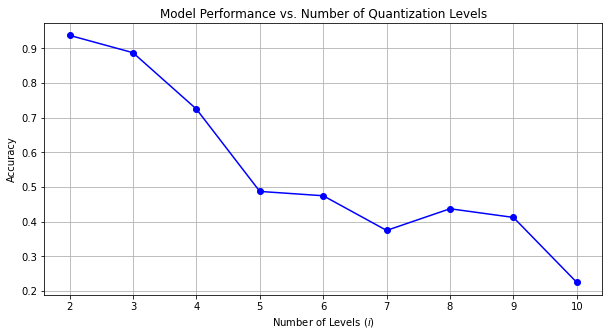

In [21]:
import matplotlib.pyplot as plt

levels = list(range(2, 11))
accuracies = [0.9375, 0.8875, 0.725, 0.4875, 0.475, 0.375, 0.4375, 0.4125, 0.225]

plt.figure(figsize = (10, 5))
plt.plot(levels, accuracies, marker = 'o', linestyle = '-', color = 'b')
plt.title('Model Performance vs. Number of Quantization Levels')
plt.xlabel('Number of Levels ($i$)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(levels)
plt.show()

This visualization would clearly show the trend of decreasing performance with an increasing number of quantization levels.

### Conclusion
The best performance at $i=2$ could indicate that the underlying problem suits a binary classification better, or that the dataset contains features that are effectively discriminative only at a broader level. For higher values of $i$, enhancing model performance might require additional features, more complex models, or techniques specifically aimed at handling multi-class classification challenges such as adjusting class weights, increasing sample size, or employing more advanced regularization techniques.

Given these results and insights, it might be beneficial to reevaluate the necessity of higher quantization levels or explore methods to better handle the increased complexity and potential data imbalances that come with them.